# Cantone et al.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from scipy.interpolate import interp1d

In [2]:
import sys
from datetime import datetime
import numpy as np

import networkx as nx
from nxpd import draw
from nxpd import nxpdParams
nxpdParams['show'] = 'ipynb'

sys.path.append("../pipelines")
import Pipelines as tdw



## Switch-On Data

In [3]:
raw_data = pd.read_csv('../data/invitro/cantone_switchon_raw_timeseries.tsv', sep = '\t')
raw_data = raw_data.set_index('Time')

In [4]:
# Manually splitting up dataframe into separate experiments
experiments = []
experiments.append(raw_data[0:11])
experiments.append(raw_data[11:26])
experiments.append(raw_data[26:36])
experiments.append(raw_data[36:46])
experiments.append(raw_data[46:62])


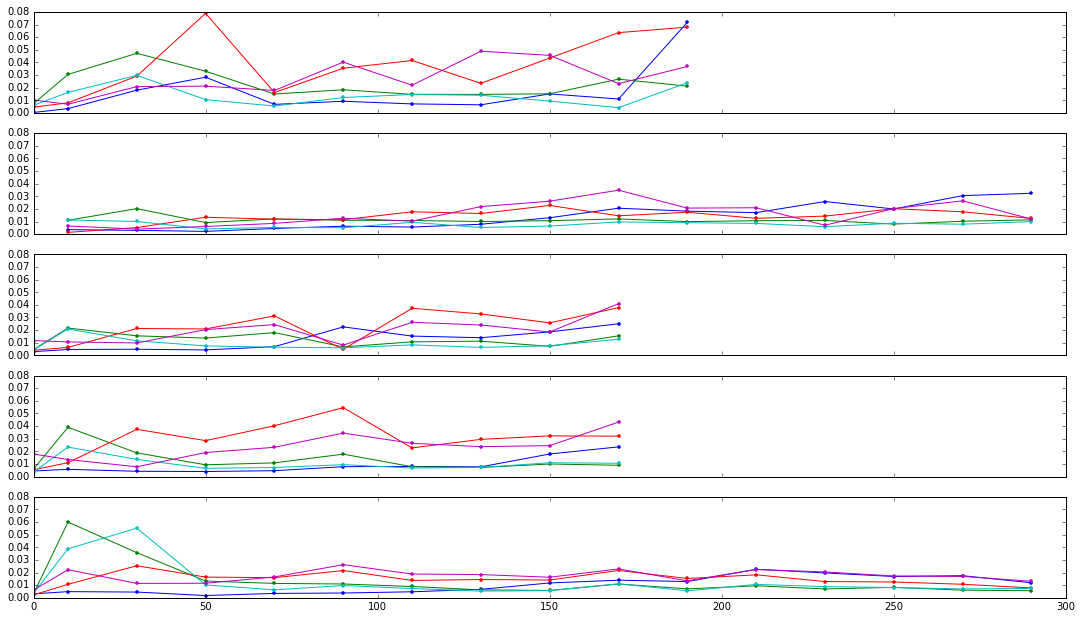

In [5]:
f, axarr = plt.subplots(5, sharex=True)
f.set_size_inches(18.5, 10.5)
for idx,exp in enumerate(experiments):
    for col in exp:
        gene_name = exp[col].name
        axarr[idx].plot(exp[col], '.-')
        axarr[idx].set_ylim([0,0.08])

#### Notes about plot above
- Exp 2 is missing time 0. Fill in with the mean of time 0 of the rest of the trials.
- Trials 1,3,4 are not as long as trials 2 and 5. Possibly use the mean of the trials 2 and 5 to fill in trials 1, 3, 4. 
- There is a great deal of variation between all the "time-series." Remember that qRT-PCR is an endpoint experiment, so the datapoints aren't true time series.

##### Impute Experiment 2 Time 0

//anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
//anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(....) is deprecated, use sort_index(.....)


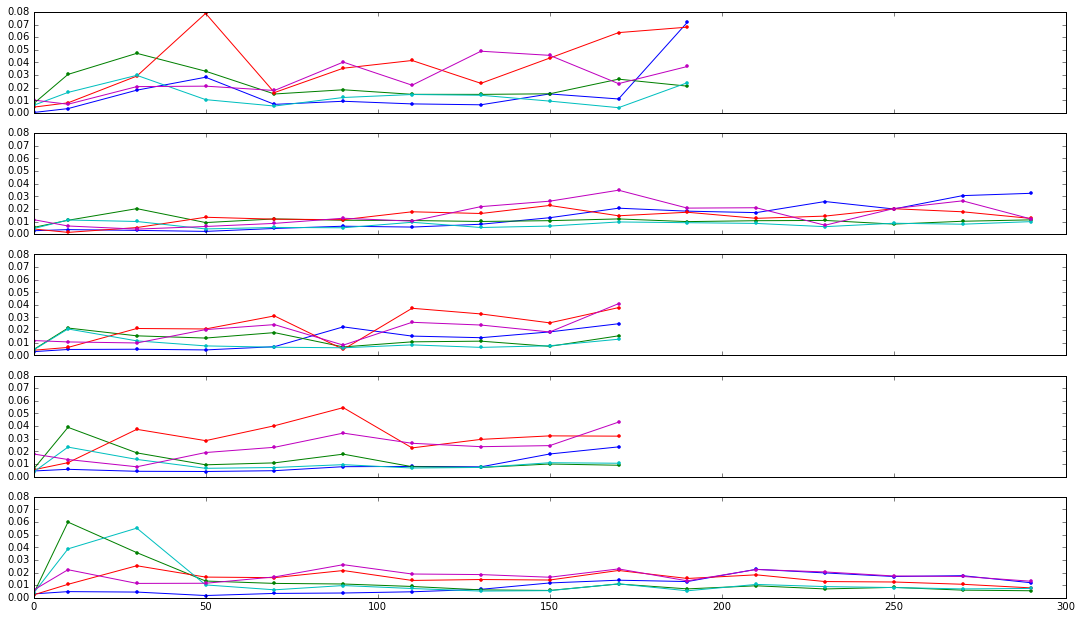

In [6]:
means = raw_data[raw_data.index==0].mean()
exp_2 = raw_data[11:26]

exp_2.loc[0] = means
exp_2 = exp_2.sort()

experiments = []
experiments.append(raw_data[0:11])
experiments.append(exp_2)
experiments.append(raw_data[26:36])
experiments.append(raw_data[36:46])
experiments.append(raw_data[46:62])

f, axarr = plt.subplots(5, sharex=True)
f.set_size_inches(18.5, 10.5)
for idx,exp in enumerate(experiments):
    for col in exp:
        gene_name = exp[col].name
        axarr[idx].plot(exp[col], '.-')
        axarr[idx].set_ylim([0,0.08])

##### Interpolate all experiments up to t=170

          CBF1      GAL4      SWI5     GAL80      ASH1
Time                                                  
0     0.000338  0.007340  0.004566  0.006024  0.010167
10    0.003412  0.030501  0.007977  0.016232  0.006872
20    0.009506  0.043535  0.011714  0.026625  0.013093
30    0.018011  0.047202  0.029157  0.029770  0.020833
40    0.026723  0.042713  0.062874  0.021682  0.023663
50    0.028262  0.033032  0.078836  0.010525  0.021197
60    0.017911  0.021972  0.050282  0.005205  0.016169
70    0.006778  0.014989  0.016120  0.005448  0.017763
80    0.005775  0.015649  0.017067  0.008669  0.031303
90    0.009227  0.018326  0.035403  0.012217  0.040246
100   0.009425  0.017179  0.044623  0.014045  0.030787
110   0.007139  0.014731  0.041521  0.014579  0.021944
120   0.005230  0.014381  0.030543  0.014618  0.032677
130   0.006434  0.014680  0.023438  0.013985  0.048867
140   0.011715  0.014039  0.029819  0.012300  0.052818
150   0.015041  0.015145  0.043435  0.009355  0.045594
160   0.01

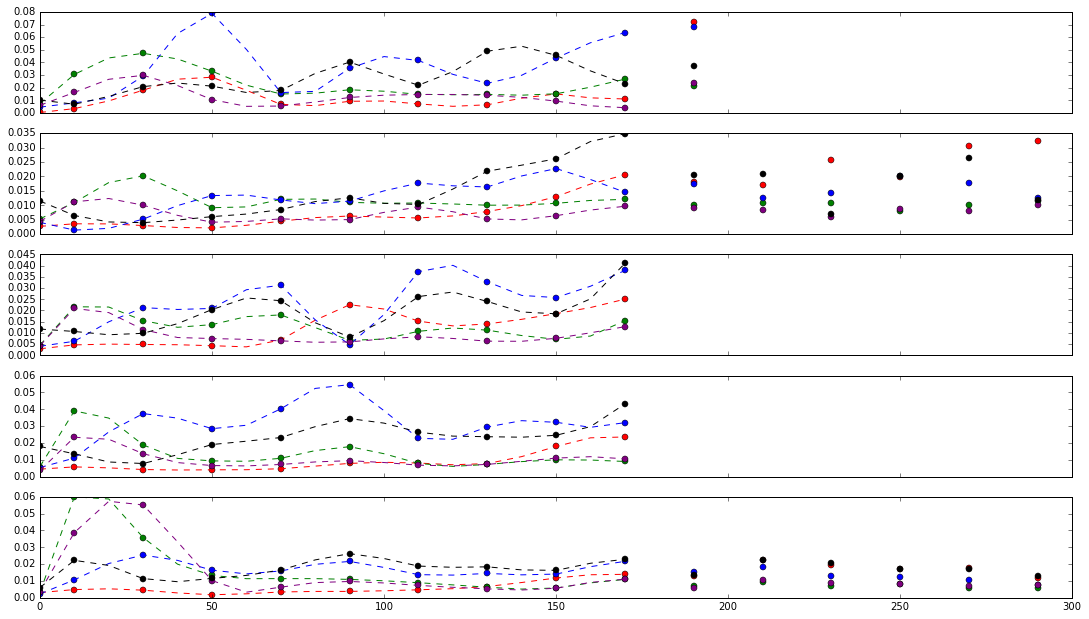

In [7]:
xi = np.linspace(0,170, num=18)
f, axarr = plt.subplots(5, sharex=True)
f.set_size_inches(18.5, 10.5)
colors = ['red', 'green', 'blue', 'purple', 'black']

exp_inter = pd.DataFrame()

for idx,exp in enumerate(experiments):    
    interpolated_df = pd.DataFrame()
    for idx2, col in enumerate(exp):        
        #graph and save interpolated series
        gene_name = exp[col].name
        
        #interpolate
        linear = interp1d(exp.index, exp[col])
        cubic = interp1d(exp.index, exp[col], kind='cubic')
        #axarr[idx].plot(exp[col], 'o', xi, linear(xi), '-', xi, cubic(xi), '--')
        
        #plot interpolation
        axarr[idx].plot(exp[col], 'o', color = colors[idx2])     
        axarr[idx].plot(xi, cubic(xi), '--', color = colors[idx2])
        interpolated_df[gene_name] = cubic(xi)
        
        #add indices
        interpolated_df.index = xi   
        interpolated_df.index.name = 'Time'
    exp_inter = exp_inter.append(interpolated_df)
    
print(exp_inter)
with open('../data/invitro/cantone_switchon_interpolated_timeseries.tsv', 'w') as out:
    exp_inter.to_csv(out, sep='\t')

## Switch-Off Data

In [8]:
raw_data = pd.read_csv('../data/invitro/cantone_switchoff_raw_timeseries.tsv', sep = '\t')
raw_data = raw_data.set_index('Time')

# Manually splitting up dataframe into separate experiments
experiments = []
experiments.append(raw_data[0:19])
experiments.append(raw_data[19:38])
experiments.append(raw_data[38:59])
experiments.append(raw_data[59:80])


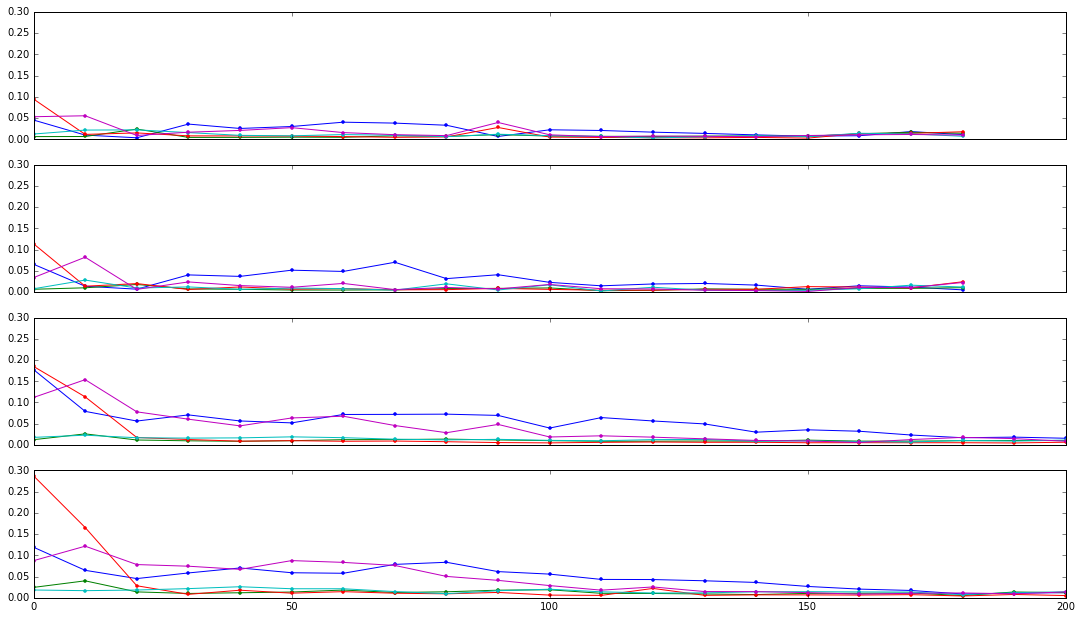

In [9]:
f, axarr = plt.subplots(4, sharex=True)
f.set_size_inches(18.5, 10.5)
for idx,exp in enumerate(experiments):
    for col in exp:
        gene_name = exp[col].name
        axarr[idx].plot(exp[col], '.-')
        axarr[idx].set_ylim([0,0.3])

##### Notes:
- No interpolation necessary
- Time-series ends at 180 for exp 1 and 2 and 200 for exp 3 and 4
- Large variation between time series. May need to be normalized.
- Time-series will be truncated at 170 for comparison to switch-on time-series data.

In [10]:
parsed_data = raw_data[(raw_data.index >= 0) & (raw_data.index <= 170)]

with open('../data/invitro/cantone_switchoff_interpolated_timeseries.tsv', 'w') as out:
    parsed_data.to_csv(out, sep='\t')

#### Testing SWING

In [59]:
data_folder = "../data/invitro/Dionesus"
file_path = "../data/invitro/cantone_switchon_interpolated_timeseries.tsv"
current_time = datetime.time
run_params = {'data_folder': data_folder,
              'file_path':file_path,
              'td_window':17,
              'min_lag':1,
              'max_lag':1,
              'n_trees':100,
              'permutation_n':10,
              'lag_method':'mean_mean',
              'calc_mse':False,
              'bootstrap_n':1000,
              'n_trials':1,
              'run_time':current_time,
              'sort_by':'rank',
              'iterating_param':'td_window',
              'filter_noisy': False
              }
            

roc,pr, tdr = tdw.get_td_stats(**run_params)

['Time', 'CBF1', 'GAL4', 'SWI5', 'GAL80', 'ASH1']
Compiling all model edges...
[DONE]
Lumping edges...
[DONE]

/Users/jfinkle/Documents/Northwestern/MoDyLS/Python/Roller/Swing/Swing.py:573: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  current_df.sort(['adj_imp'], ascending=False, inplace=True)
/Users/jfinkle/Documents/Northwestern/MoDyLS/Python/Roller/Swing/Swing.py:699: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  sort_df.sort(sort_field, ascending=True, inplace=True)



Calculating rank edge importance...
[DONE]
20
Scoring model...
[DONE]
0.822916666667
0.627455357143
